<a href="https://colab.research.google.com/github/RomyPatel/Covid-19/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

Collecting data


In [5]:
df= pd.read_excel('/content/covid19-India.xlsx')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,IND,Asia,India,2020-01-30,1,1,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
1,IND,Asia,India,2020-01-31,1,0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2,IND,Asia,India,2020-02-01,1,0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
3,IND,Asia,India,2020-02-02,2,1,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
4,IND,Asia,India,2020-02-03,3,1,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,IND,Asia,India,2021-03-14,11385339,26291,22277.286,158725.0,118.0,124.571,8250.219,19.051,16.143,115.018,0.086,0.090,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864368.0,226703641.0,164.277,0.626,753305.0,0.546,0.03,33.8,samples tested,29908038.0,24452385.0,5455653.0,169629.0,1274147.0,2.17,1.77,0.40,923.0,NaN,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
410,IND,Asia,India,2021-03-15,11409831,24492,23577.857,158856.0,131.0,132.286,8267.967,17.748,17.085,115.113,0.095,0.096,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,703772.0,227407413.0,164.787,0.510,761966.0,0.552,NaN,NaN,samples tested,32947432.0,27079484.0,5867948.0,3039394.0,1419814.0,2.39,1.96,0.43,1029.0,NaN,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
411,IND,Asia,India,2021-03-16,11438734,28903,25146.714,159044.0,188.0,140.143,8288.911,20.944,18.222,115.249,0.136,0.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064536.0,28862037.0,6202499.0,2117104.0,1528090.0,2.54,2.09,0.45,1107.0,NaN,1380004385,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.6

Data Cleaning

In [6]:
print(df.dtypes)

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                       int64
new_cases                                         int64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

In [7]:
df.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         48
icu_patients                             414
icu_patients_per_million                 414
hosp_patients                            414
hosp_patients_per_million                414
weekly_icu_admissions                    414
weekly_icu

In [8]:
df= df.rename(columns= {'new_cases' : 'y', 'date' : 'ds'})

In [9]:
df= df[['ds','y']]
df

,ds,y
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1
...,...,...
409,2021-03-14,26291
410,2021-03-15,24492
411,2021-03-16,28903
412,2021-03-17,35871


In [10]:
df['ds']= pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      414 non-null    datetime64[ns]
 1   y       414 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.6 KB


Data Visualization

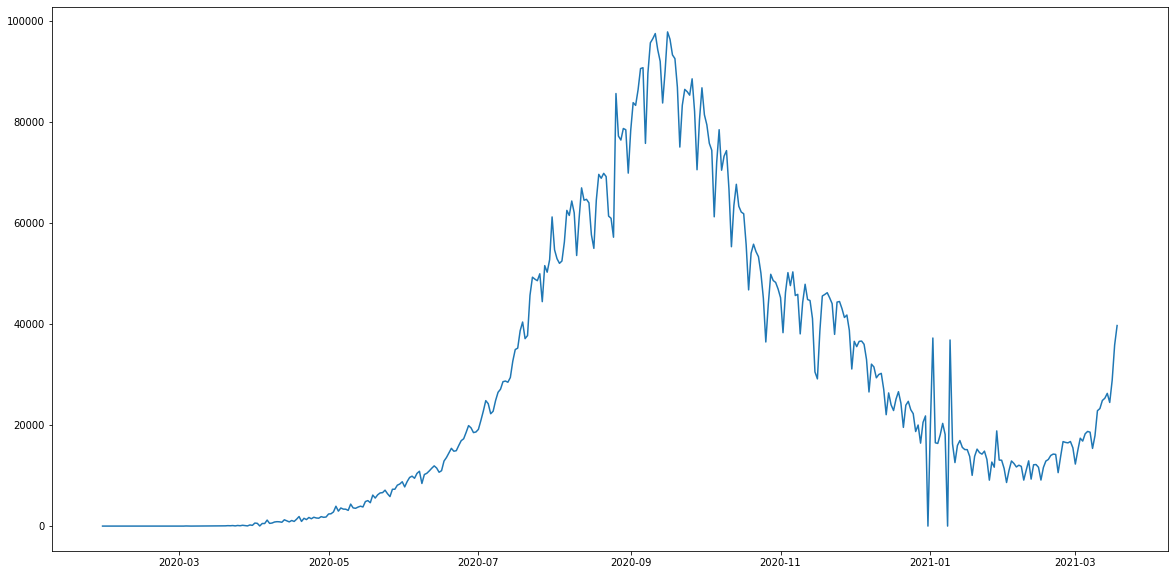

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize= (20,10))
plt.plot(df['ds'], df['y'])
plt.show()

Forecasting

In [12]:
import fbprophet
op= fbprophet.Prophet()
op.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
forecast= op.make_future_dataframe(periods= 365, freq= 'D')
forecast= op.predict(forecast)

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,-1223.669302,-8238.517963,5119.113572
1,2020-01-31,-1320.274764,-8473.670990,4674.545912
2,2020-02-01,-433.635621,-6693.118203,6234.445898
3,2020-02-02,-2434.659712,-8445.121938,4027.220362
4,2020-02-03,-5940.364837,-11731.741479,643.561472
...,...,...,...,...
774,2022-03-14,-3479.621508,-217086.223907,207577.787778
775,2022-03-15,-286.325708,-212977.534506,211127.173678
776,2022-03-16,2125.534070,-213365.857467,213244.008846
777,2022-03-17,1339.378604,-213483.757928,216321.948243


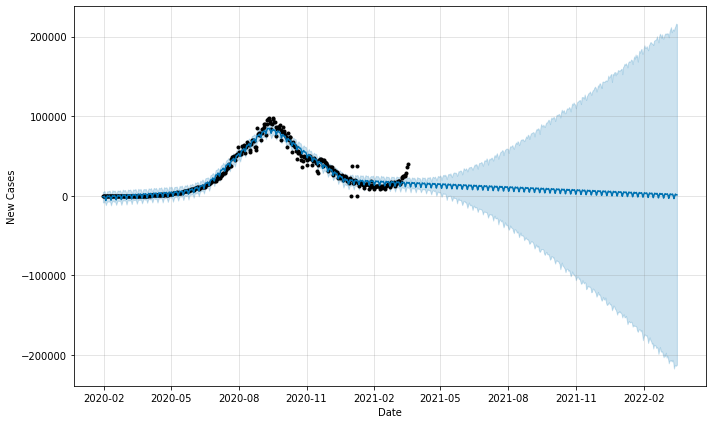

In [15]:
op.plot(forecast, xlabel= 'Date', ylabel= 'New Cases');